In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install pennylane

clear_output()

In [ ]:
from pennylane import numpy as np

In [ ]:
import pennylane as qml

In [ ]:
! pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#I.10.1
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    return qml.expval(qml.PauliY(0))

print(circuit())

-0.7071067811865471


In [ ]:
# just for testing
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def testing_ckt():
  qml.Hadamard(wires=0)
  qml.PauliY(wires=0)
 # qml.CNOT(wires=[0,1])
  return qml.expval(qml.PauliX(0))

print(testing_ckt())

-0.9999999999999996


In [ ]:
#I.11.2
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def two_qubit_circuit():

    # Prepare |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)

    # Return the expected values
    return (qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1)))

print(two_qubit_circuit())

(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


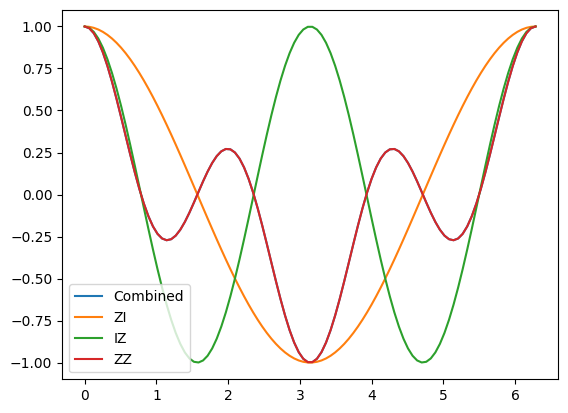

In [ ]:
#I.11.4
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    #vjnjfn
    qml.RX(theta, wires=0)
    qml.RY(2 * theta, wires=1)

    # Return expected value of Z \otimes I and I \otimes Z
    return (qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)))


@qml.qnode(dev)
def circuit_2(theta):
    qml.RX(theta, wires=0)
    qml.RY(2 * theta, wires=1)

    # Return expected value of Z \otimes Z
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):

    combined_results = np.zeros(len(ZI_results))
    return ZI_results * IZ_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
#plt.plot(theta, ZI_results, IZ_results, ZZ_results, combined_results)
plt.plot(theta, combined_results)
#hold on
plt.plot(theta, ZI_results)
plt.plot(theta, IZ_results)
plt.plot(theta, ZZ_results)
plt.legend(['Combined','ZI','IZ','ZZ'])
plt.show()

In [ ]:
#I.12.1
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def apply_cnot(basis_id):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=2)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    # APPLY THE CNOT
    qml.CNOT(wires = [0,1])

    return qml.state()

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {
    "00" : "00",
    "01" : "01",
    "10" : "11",
    "11" : "10"
}

# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(1))

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


In [ ]:
#I.12.2
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def apply_h_cnot():

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

    return qml.state()


print(apply_h_cnot())

# This is the maximally entangled bell state B_00
state_status = "entangled"

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [ ]:
#I.12.3
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires = [0,1])
    qml.CRY(phi, wires = [1,2])
    qml.CRZ(omega, wires = [2,0])

    return qml.probs(wires = [0,1,2])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))

[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


In [1]:
#I.14.1
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def prepare_psi_plus():
    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(wires = 1)
    qml.PauliX(wires = 0)
    qml.CNOT(wires = [1,0])
    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.PauliX(wires = 1)
    qml.Hadamard(wires = 1)
    qml.PauliX(wires = 0)
    qml.PauliX(wires = 1)
    qml.CNOT(wires = [1,0])
    return qml.state()

psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")


NameError: ignored